# 1. Basic Knowledge Graph

In [13]:
from pyvis.network import Network

# Create a new network
net = Network(
    select_menu=True,
    filter_menu=True,
)

# Add nodes
net.add_node("Mary", label="Mary")
net.add_node("John", label="John")
net.add_node("Teradata", label="Teradata")

# Add edges to represent the working relationships
net.add_edge("Mary", "Teradata", title="works at")
net.add_edge("John", "Teradata", title="works at")


# Save and show the network
net.show("index.html", local=False, notebook=False)

index.html


In [10]:
net.get_node("Teradata")

{'color': '#97c2fc', 'id': 'Teradata', 'label': 'Teradata', 'shape': 'dot'}

# 2. Auto Generate Knowledge Graph

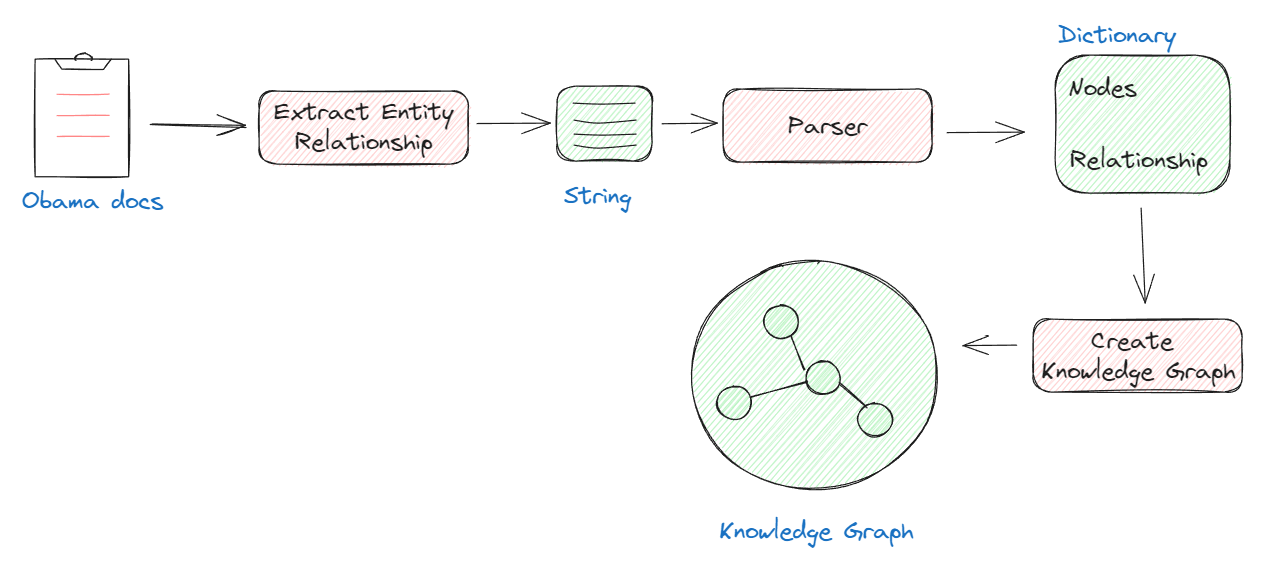

In [18]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI
import json

**Step 1**: Create chain using OpenAI API to extract entity

In [59]:
instruction = """
    You are a data scientist working for a company that is building a graph database. Your task is to extract information from data and convert it into a graph database.
    Provide a set of Nodes in the form [ENTITY_ID, TYPE, PROPERTIES] and a set of relationships in the form [ENTITY_ID_1, RELATIONSHIP, ENTITY_ID_2, PROPERTIES].
    It is important that the ENTITY_ID_1 and ENTITY_ID_2 exists as nodes with a matching ENTITY_ID. If you can't pair a relationship with a pair of nodes don't add it.
    When you find a node or relationship you want to add try to create a generic TYPE for it that  describes the entity you can also think of it as a label.
    Note that output must in dictionary type
    
    Example:
    Input : Alice lawyer and is 25 years old and Bob is her roommate since 2001. Bob works as a journalist. Alice owns a the webpage www.alice.com and Bob owns the webpage www.bob.com.
    Output : 
    { "Nodes": ["alice", "Person", {"age": 25, "occupation": "lawyer", "name":"Alice"}], ["bob", "Person", {"occupation": "journalist", "name": "Bob"}], ["alice.com", "Webpage", {"url": "www.alice.com"}], ["bob.com", "Webpage", {"url": "www.bob.com"}],
      "Edges": ["alice", "roommate", "bob", {"start": 2021}], ["alice", "owns", "alice.com", {}], ["bob", "owns", "bob.com", {}]
      }
"""

documents = """
    Barack Hussein Obama II (/bəˈrɑːk huːˈseɪn oʊˈbɑːmə/ (audio speaker iconlisten); born August 4, 1961)[1] is an American politician and attorney. 
    He was the 44th president of the United States from 2009 to 2017. He was the first African-American president in U.S. history. 
    As a member of the Democratic Party, he also served as member of the Illinois Senate from 1997 to 2004 and a United States senator from Illinois from 2005 to 2008.
    Obama was born in Honolulu, Hawaii. He married Michelle Robinson in 1992. They have two daughters, Malia Obama and Sasha Obama.
    Obama was inaugurated in January 2009 as the first African American mixed-race president. 
    As president, he slowly ended US participation in the Iraq War, having prepared the country to defend itself. 
    The al-Qaeda terrorist leader Osama bin Laden was killed while Obama was in office. Also, he contributed to the overthrow of Muammar Gaddafi in Libya.
    Obama signed the Patient Protection and Affordable Care Act (often called "Obamacare") which changed many health care laws. 
    He also enacted many acts to create public works jobs to help the economy. He became the first president to openly express support for gay marriage, 
    and proposed gun control as a result of the Sandy Hook school shooting.

    Joseph Robinette Biden Jr. (/ˈbaɪdən/ ⓘ BY-dən; born November 20, 1942) is an American politician who is the 46th and current president of the United States. A member of the Democratic Party, he previously served as the 47th vice president from 2009 to 2017 under President Barack Obama and represented Delaware in the United States Senate from 1973 to 2009.
    Born in Scranton, Pennsylvania, Biden moved with his family to Delaware in 1953. He graduated from the University of Delaware before earning his law degree from Syracuse University. 
    He was elected to the New Castle County Council in 1970 and to the U.S. Senate in 1972. As a senator, Biden drafted and led the effort to pass the Violent Crime Control and Law Enforcement
    Act and the Violence Against Women Act. He also oversaw six U.S. Supreme Court confirmation hearings, including the contentious hearings for Robert Bork and Clarence Thomas. 
    Biden ran unsuccessfully for the Democratic presidential nomination in 1988 and 2008. In 2008, Obama chose Biden as his running mate, and he was a close counselor to Obama during his 
    two terms as vice president. In the 2020 presidential election, Biden and his running mate, Kamala Harris, defeated incumbents Donald Trump and Mike Pence. He is the oldest president 
    in U.S. history, and the first to have a female vice president.

    Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who served as the 45th president of the United States from 2017 to 2021.
    Trump received a Bachelor of Science in economics from the University of Pennsylvania in 1968, and his father named him president of his real estate business in 1971. Trump renamed it the Trump Organization and reoriented the company toward building and renovating skyscrapers, 
    hotels, casinos, and golf courses. After a series of business failures in the late twentieth century, he successfully launched side ventures that required little capital, 
    mostly by licensing the Trump name. From 2004 to 2015, he co-produced and hosted the reality television series The Apprentice. He and his businesses have been plaintiff or defendant 
    in more than 4,000 state and federal legal actions, including six business bankruptcies.
"""

In [60]:
# Create prompt template
prompt_template = PromptTemplate.from_template("""
    {instruction}
    Here is document. {documents}
"""
)

llm = OpenAI(max_tokens=-1)
llm_chain = LLMChain(prompt=prompt_template, llm=llm)
result = llm_chain.run(instruction=instruction, documents=documents)

In [61]:
print(result)

    { "Nodes": [["BarackObama", "Person", {"date_of_birth": "August 4, 1961", "place_of_birth": "Honolulu, Hawaii", "party": "Democratic Party"}],
               ["MichelleObama", "Person", {"date_of_marriage": "1992", "children": 2, "name": "Michelle"}],
               ["MaliaObama", "Person", {"name": "Malia"}], 
               ["SashaObama", "Person", {"name": "Sasha"}],
               ["OsamaBinLaden", "Person", {"date_of_death": "May 2, 2011"}],
               ["MuammarGaddafi", "Person", {"date_of_death": "October 20, 2011"}],
               ["JosephBiden", "Person", {"date_of_birth": "November 20, 1942", "place_of_birth": "Scranton, Pennsylvania", "party": "Democratic Party"}],
               ["KamalaHarris", "Person", {"party": "Democratic Party"}],
               ["DonaldTrump", "Person", {"date_of_birth": "June 14, 1946", "party": "Republican Party"}],
               ["UniversityOfDelaware", "University", {"name": "University of Delaware"}],
               ["SyracuseUniversit

**Step 2**: Define Parser

In [62]:
def parser(result):
    """
    Convert string to dictionary with "Nodes" and "Edges" as keys.
    """
    return json.loads(result)

In [63]:
result_parsed = parser(result)

**Step 3**: Create Knowledge Graph

In [64]:
from pyvis.network import Network

In [65]:
net = Network(
    notebook=True, 
    cdn_resources="remote", 
    bgcolor="#222222",
    font_color="white",
    height="750px",
    width="100%",
    select_menu=True,
    filter_menu=True,
)

In [70]:
# Create Nodes and Edges
for node in result_parsed.get("Nodes"):
    net.add_node(node[0], label=node[0], title=str(node[2]))
   
for edge in result_parsed.get("Edges"):
    from_node, title_edge, to_node = edge[0], edge[1], edge[2]
    try:
        net.add_edge(from_node, to=to_node, title=title_edge)
    except:
        net.add_node(to_node, label=to_node, title=str(to_node))
        net.add_edge(from_node, to=to_node, title=title_edge)
        # print(relationship)

In [72]:
net.show('edges.html')

edges.html
